# Física Computacional I: Generalidades de Scipy

## Elabordo por: Ph.D. Santiago Echeverri Arteaga

In [4]:
dir(stats)

['ConstantInputWarning',
 'DegenerateDataWarning',
 'FitError',
 'NearConstantInputWarning',
 'NumericalInverseHermite',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_axis_nan_policy',
 '_biasedurn',
 '_binned_statistic',
 '_binomtest',
 '_boost',
 '_common',
 '_constants',
 '_continuous_distns',
 '_crosstab',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_entropy',
 '_fit',
 '_hypotests',
 '_hypotests_pythran',
 '_kde',
 '_ksstats',
 '_levy_stable',
 '_mannwhitneyu',
 '_morestats',
 '_mstats_basic',
 '_mstats_extras',
 '_multivariate',
 '_mvn',
 '_page_trend_test',
 '_qmc',
 '_qmc_cy',
 '_relative_risk',
 '_resampling',
 '_rvs_sampling',
 '_sobol',
 '_statlib',
 '_stats',
 '_stats_mstats_common',
 '_stats_py',
 '_tukeylambda_stats',
 '_unuran',
 '_variation',
 '_warnings_errors',
 'alexandergovern',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsi

In [1]:
import pandas as pd
from scipy import stats, optimize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Variables aleatorias

DIST
Mean: 0.0 Variance: 1.0 Skew: 0.0 Kurt: 0.0
DIST2
Mean: 5.0 Variance: 10.0 Skew: 1.265 Kurt: 2.4


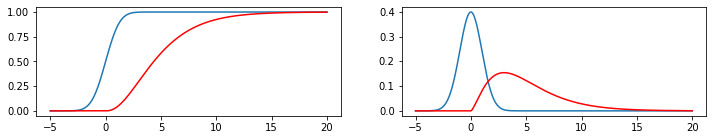

In [155]:
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(12, 2))
x = np.linspace(-5,20,1000)

dist = stats.norm(loc=0, scale=1)
dist2 = stats.chi2(df=5)

pdf = dist.pdf(x)
cdf = dist.cdf(x)

pdf2 = dist2.pdf(x)
cdf2 = dist2.cdf(x)

sample = dist.rvs(500)
sample2 = dist2.rvs(500)

axes[0].plot(x,cdf)
axes[0].plot(x,cdf2,color='r')

axes[1].plot(x,pdf)
axes[1].plot(x,pdf2,color='r')

m,v,s,k = dist.stats(moments='mvsk')
m2,v2,s2,k2 = dist2.stats(moments='mvsk')
print('DIST\nMean: {0} Variance: {1} Skew: {2} Kurt: {3}'.format(m,v,s,k))
print('DIST2\nMean: {0} Variance: {1} Skew: {2:.3f} Kurt: {3}'.format(m2,v2,s2,k2))

In [180]:
print(dist.expect(lambda x: 1, lb=0.0, ub=2.0), dist.cdf(2.0) - dist.cdf(0.0))

0.4772498680518209 0.4772498680518208


#### Crear distribuciones y encontrar los mejores parámetros que ajustan los datos a una distribución (Maximum likelihood estimation)

In [186]:
data = dist.rvs(1000)
from scipy.stats import rv_continuous
class gaussian_gen(rv_continuous):
    '''Gaussian distribution'''
    def _pdf(self, x):
        return np.exp(-x**2 / 2.) / np.sqrt(2.0 * np.pi)
gaussian = gaussian_gen(name='gaussian')

print('Fit Gaussiano de la distribución\nLos parámetros serían',gaussian.fit(data))
print('Fit Chi cuadrado de la distribución\nLos parámetros serían',stats.chi2.fit(data))
print('Fit Normal de la distribución\nLos parámetros serían',stats.norm.fit(data))

Fit Gaussiano de la distribución
Los parámetros serían (-0.03350816428862874, 0.9853398415359033)
Fit Chi cuadrado de la distribución
Los parámetros serían (1.156354420629563, -3.3384326516721576, 1.0286789567783274)
Fit Normal de la distribución
Los parámetros serían (-0.03350816428862933, 0.9853398411944276)


### Distribución no paramétrica

#### Estimador Kernel

<AxesSubplot:ylabel='Density'>

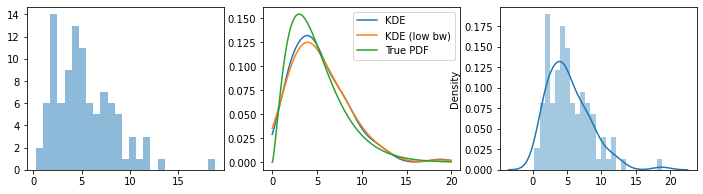

In [6]:
# Se genera un array de 0 a 200 para la graficación (Datos eje X)
x = np.linspace(0, 20, 10000)
# Se generan los valores de la variable aleatoria en términos de una distribución chi cuadrado (Datos frecuencias eje y)
X = stats.chi2(df=5)
X_samples = X.rvs(100)

# Crea estancias de graficación en Matplotlib
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# 
kde = stats.kde.gaussian_kde(X_samples)
kde_low_bw = stats.kde.gaussian_kde(X_samples, bw_method=0.5)

# Realiza graficas en Seaborn y Matplotlib
axes[0].hist(X_samples, alpha=0.5, bins=25)
axes[1].plot(x, kde(x), label="KDE")
axes[1].plot(x, kde_low_bw(x), label="KDE (low bw)")

# PDF a partir de la distribución chi cuadrado

axes[1].plot(x, X.pdf(x), label="True PDF")
axes[1].legend()

# Grafico de seaborn
sns.distplot(X_samples, bins=25, ax=axes[2])

In [7]:
def _kde_cdf(x):
    return kde.integrate_box_1d(-np.inf, x)
kde_cdf = np.vectorize(_kde_cdf)

In [19]:
kde_ppf(0.05)

array(0.67765973)

In [11]:
def _kde_ppf(q):
    return optimize.fsolve(lambda x, q: kde_cdf(x) - q, kde.dataset.mean(), args=(q,))[0]
kde_ppf = np.vectorize(_kde_ppf) # Para que la salida sea un array

In [20]:
#kde_ppf([0.05, 0.95])
np.array([_kde_ppf(i) for i in [0.05,0.95]])

array([ 0.67765973, 11.27544725])

In [23]:
kde_cdf(0.67765973)

array(0.05)

In [24]:
X2 = stats.norm(3, 4)
X2_sample = X2.rvs(100)

### QQ-Plot y transformación BoxCox

                Valor usado de Lambda: 2.569                


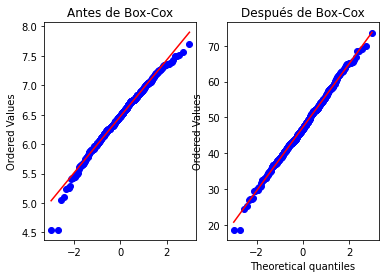

In [26]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
x = stats.loggamma.rvs(5, size=500) + 5
stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Antes de Box-Cox')
ax2 = fig.add_subplot(122)
xt, lmbda = stats.boxcox(x)
stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Después de Box-Cox')
print('Valor usado de Lambda: {0:.3f}'.format(lmbda).center(60))

El sesgo de los datos iniciales fue de -0.394 y de los datos transformados fue 0.005


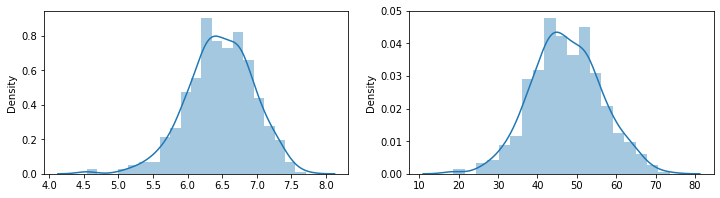

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
sns.distplot(x,ax=axes[0])
sns.distplot(xt,ax=axes[1])
print('El sesgo de los datos iniciales fue de {0:.3f} y de los datos transformados fue {1:.3f}'.format(stats.skew(x),stats.skew(xt)))

El sesgo de los datos iniciales fue de -0.394 y de los datos con inv_boxcox -0.394
¿Son iguales? Respuesta: True


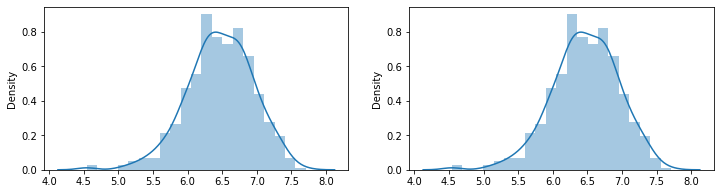

In [28]:
from scipy.special import inv_boxcox
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
sns.distplot(x,ax=axes[0])
sns.distplot(inv_boxcox(xt,lmbda),ax=axes[1])
print('El sesgo de los datos iniciales fue de {0:.3f} y de los datos con inv_boxcox {1:.3f}'.format(stats.skew(x),stats.skew(inv_boxcox(xt,lmbda))))
print('¿Son iguales? Respuesta: {}'.format(np.allclose(x,inv_boxcox(xt,lmbda))))

In [29]:
x==inv_boxcox(xt,lmbda)

array([False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False, False, False, False,  True, False,  True,  True, False,
       False, False, False,  True, False,  True, False, False,  True,
        True, False,  True, False, False, False, False, False, False,
       False,  True,  True, False,  True,  True, False,  True, False,
       False,  True,  True, False, False, False,  True,  True,  True,
        True, False, False,  True,  True, False,  True, False, False,
        True,  True, False,  True, False,  True, False, False, False,
        True, False, False, False,  True, False, False,  True, False,
       False,  True, False, False,  True, False, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False,  True, False, False, False, False, False,
        True,  True,  True, False,  True, False,  True, False, False,
        True, False,